# Movie Clustering Notebook - Unsupervised Learning in Python
---
Autor: David Cardona Duque
---
## Contexto general y tema de estudio

Este proyecto es una demostración del uso de técnicas de clustering no supervisado para agrupar películas según sus características en un conjunto de datos. El objetivo es explorar cómo los algoritmos de clustering pueden ser utilizados para identificar patrones y relaciones en los datos de películas, y cómo estos patrones pueden ser utilizados para crear grupos de películas similares.

## Problema o pregunta de estudio y motivación

En la industria del cine, es importante comprender qué características hacen que una película sea exitosa y cómo se pueden agrupar las películas en categorías basadas en estas características. Esto puede ayudar a los estudios cinematográficos a tomar decisiones más informadas sobre qué películas producir y cómo comercializarlas. Por lo tanto, la pregunta que se aborda en este proyecto es: ¿cómo se pueden agrupar las películas en función de sus características para identificar patrones y relaciones?

## Objetivo del informe

El objetivo de este informe es proporcionar una demostración del uso de técnicas de clustering no supervisado en Python para agrupar películas según sus características. En este informe, se describe el conjunto de datos utilizado, se presentan los resultados de los diferentes algoritmos de clustering utilizados y se discuten las implicaciones de los resultados. Este informe también proporciona un código detallado y comentarios para permitir que otros usuarios reproduzcan los resultados y exploren los datos por sí mismos.



## Lectura inicial de librerias

In [1]:

#Liberias
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import plotly.express as px

 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.metrics import pairwise_distances_argmin_min

# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.cluster import KMeans


## Exploracion base de datos


### Lectura inicial de la base de datos e identificacion de variables

In [2]:
#Lectura Base de datos del Imdb
df = pd.read_csv('IMDB_movie_reviews_details.csv')
df

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
...,...,...,...,...,...,...,...,...,...,...
995,995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,"169,575",NaN
996,996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,"34,759",NaN
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M
998,998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...","44,086",$30.50M


In [3]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'runtime', 'genre', 'rating', 'metascore',
       'timeline', 'votes', 'gross'],
      dtype='object')

* Unnamed: 0: posicion en el ranking
* name: Name of the movie
* year: Year of release
* runtime: Movie runtime
* genre: Movie Genre
* metascore: Metascore on IMDB (calificacion por criticos especializados en cine)
* rating: IMDB Ratings
* timeline: Short storyline of the movie
* votes: Total votes earned on IMDB
* gross: Box-office grossings (dinero recogido en taquilla por la pelicula en su tiempo en cines)

## Depuracion de la base de datos

### Depuracion tipos de las variables
Se identifica que las variables "votes", "gross", "year" estan en tipos de datos inadecuados por lo siguiente:

* La variable "votes", la cual representa la cantidad de votos numericos en la plataforma con respecto a la pelicula, en tiene comas "," separadores lo cual daña el formato necesario para que sea leido como numero, se procedara a cambiar esto.



* La variable "gross" la cual representa en millones el dinero recogido por la pelicula en su tiempo en cine, tiene un formato inadecuado debido a la "M" y al simbolo "$", se haran los cambios necesarios para tratarla como numerica, por comodidad se seguira tratando como unidades de millon y no se escribira el numero entero, por ejemplo: 1 000 000 se mantendra como 1.



* La variable "year" de manera intuitiva como su nombre lo indica representa un año de publicacion de la pelicula, se procedera a hacer el cambio de dato a tipo "int" para poder generar analisis de manera mas certera a la hora de, por ejemplo, observar el comportamiento de peliculas desde un año determinado. Por otro lado, se identifica que algunos años estan discriminados como I o II para indicar primer semestre o segundo, en nuestro analisis esto no tendra relevancia y por lo tanto se eliminaran.

In [4]:
df.dtypes


Unnamed: 0      int64
name           object
year           object
runtime         int64
genre          object
rating        float64
metascore     float64
timeline       object
votes          object
gross          object
dtype: object

In [5]:

df["votes"] = df["votes"].replace({',':''}, regex=True) #Se eliminan las comas de los numeros de votos
df = df.astype({"votes":"int"})
df.dtypes


Unnamed: 0      int64
name           object
year           object
runtime         int64
genre          object
rating        float64
metascore     float64
timeline       object
votes           int64
gross          object
dtype: object

In [6]:

df["gross"] = df["gross"].str.replace('[$,M]','',regex=True) #Se eliminan las M y $
df = df.astype({"gross":"float"})
df.dtypes

Unnamed: 0      int64
name           object
year           object
runtime         int64
genre          object
rating        float64
metascore     float64
timeline       object
votes           int64
gross         float64
dtype: object

In [7]:
df["year"] = df["year"].str.replace('[I,II]','',regex=True) #Se eliminan las M y $
df = df.astype({"year":"int"})
df.dtypes

Unnamed: 0      int64
name           object
year            int64
runtime         int64
genre          object
rating        float64
metascore     float64
timeline       object
votes           int64
gross         float64
dtype: object

Se identifica que la variable "Unnamed: 0" se refiere al puesto en el que esta cada pelicula en el ranking, comenzando desde el numero 0, por esto se procede a cambiar su nombre y por claridad se le sumara 1 unidad a cada entrada para que el ranking comience desde 1.

In [8]:
df=df.rename(columns={"Unnamed: 0":"posicion"})

for index in range(df.shape[0]):
    
   df.iloc[index, 0]=df.iloc[index, 0]+1

df

,posicion,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,1,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,2394059,28.34
1,2,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,1658439,134.97
2,3,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...",78266,NaN
3,4,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,2355907,534.86
4,5,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,1152912,57.30
...,...,...,...,...,...,...,...,...,...,...
995,996,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,169575,NaN
996,997,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,34759,NaN
997,998,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,37753,20.00
998,999,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...",44086,30.50


###Depuracion de valores outliers

Se procedaera a identificar por variable numerica mediante distintos analisis, si se presentan valores outliers y que hacer con respecto a estos.

* year: Se analisa valores atipicos observando una cota superior e inferior, definidas mediante un analisis empirico sustentado en que no deberian existir peliculas publicadas en un año mayor al actual, ni en un año menor a 1900 debido a la fecha de invension del cine. No se encuentran valores outliers dentro de la variable year

In [9]:
check_outliers=False
for index in range(df.shape[0]):#Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,2]<1900 or df.iloc[index,2]>2022:
        check_outliers=True
        break

print(check_outliers)

False


* runtime: Se hace un analisis de cota superior e inferior basado en un analisis empirico de los tiempos de duracion que deberia tener una pelicula, segun la duracion establecida por los festivales de cine. Se identifica en primer lugar un valor atipico, una duracion de 321 minutos, lo cual es posible pero improbable, se consulta dentro de la pagina de IMDB y se verifica que efectivamente este es el tiempo de duracion, por lo tanto no se hace ningun cambio. Aparte de este valor no se identifican otros.

In [10]:
check_outliers=False
for index in range(df.shape[0]): #Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,3]<40 or df.iloc[index,3]>300:
        check_outliers=True
        print(df.iloc[index,1])
        print(df.iloc[index,3])
        

print(check_outliers)

Gangs of Wasseypur
321
True


rating: Se hace un analisis sabiendo que el valor maximo de calificacion en IMDB es de 10 y el valor minimo de 0, no se encuentran valores atipicos.

In [11]:
check_outliers=False
for index in range(df.shape[0]): #Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,5]<0 or df.iloc[index,5]>10:
        check_outliers=True
        break
        #print(df.iloc[index,1])
        #print(df.iloc[index,3])
        

print(check_outliers)

False


metascore: Se hace un analisis sabiendo que el valor maximo de calificacion en IMDB es de 100 y el valor minimo de 0, no se encuentran valores atipicos.

In [12]:
check_outliers=False
for index in range(df.shape[0]): #Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,6]<0 or df.iloc[index,6]>100:
        check_outliers=True
        break
        #print(df.iloc[index,1])
        #print(df.iloc[index,3])
        

print(check_outliers)

False


votes: Analizando el diagrama de cajas se evidencian varios varolores que podrian ser considerados outliers, pero luego de investigar se encuentra que son valores reales y que tienen ese valor debido a la naturaleza de los datos, hay peliculas mas famosas y que tienen muchos mas votos en IMDB que otras.

In [13]:

fig = px.box(df['votes'], y="votes")
fig.show()

gross: Dentro del grafico de cajas podemos evidenciar 2 cosas:

* La primera es que existen valores muy extremos pero estos no se modificaran debido a la naturaleza de los datos, es razonable que exitan peliculas con valores de recolleccion de dinero en taquilla mucho mas altos que otras.

* La segunda es que el valor de algunas peliculas es de 0, aunque esto es posible es extremandamente poco probable que suceda, luego de investigar en IMDB se evidencia que estos datos son incorrectos, por esto se procede a cambiarlos.

In [14]:
fig = px.box(df['gross'], y="gross")
fig.show()

In [15]:
check_outliers=False
for index in range(df.shape[0]): #Se recorren las columnas en busca de valores que cumplan el criterio siguiente
    if df.iloc[index,9]==0 :
        check_outliers=True
        print(index)
        print(df.iloc[index,1])
        print(df.iloc[index,9])
        

print(check_outliers)

527
Knockin' on Heaven's Door
0.0
633
Mr. Nobody
0.0
639
Adam's Apples
0.0
True


In [16]:
df.iat[527,9]=0.401 #Se cambia el valor de la pelicula Knockin' on Heaven's Door por el valor encontrado en IMDB en unidades de million

df.iat[633,9]=3.559 #Se cambia el valor de la pelicula Mr. Nobody por el valor encontrado en IMDB en unidades de million

df.iat[639,9]=2.421 #Se cambia el valor de la pelicula Adam's Apples por el valor encontrado en IMDB en unidades de million


In [17]:
fig = px.box(df['gross'], y="gross")
fig.show()

###Depuracion valores NaN
Se determina que hay varios valores NaN dentro del dataset, se procedera a hacer los cambios necesarios del mismo.

Se comenzara un analisis variable por variable para verificar en cual especificamente estan estos valores, para posteriormente tomar decisiones sobre estos.

In [18]:

#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df.isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df.isnull().sum().sum()
print (total_nan_values)

True
330


* Variable "posicion": No se identifican valores NaN en esta.




In [19]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["posicion"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df["posicion"].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "name": No se identifican valores NaN en esta.

In [20]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["name"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df["name"].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "year": No se identifican valores NaN en esta.

In [21]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["year"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df["year"].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "runtime": No se identifican valores NaN en esta.

In [22]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["runtime"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df["runtime"].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "genre":  No se identifican valores NaN en esta.

In [23]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["genre"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df["genre"].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "rating": No se identifican valores NaN en esta.

In [24]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["rating"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df["rating"].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "metascore": se identifican valores del tipo NaN, son un cantidad de 159 entradas las que contienen estos valores, debido a que la cantidad total de entradas en el dataframe es de 1000 se considera que la eliminacion de estas no es procedente, por lo tanto, se llenaran estos valores con el promedio de a columna, ya que, este valor no cambiaria el analisis de manera significativa a futuro

In [25]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["metascore"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df['metascore'].isnull().sum().sum()
print (total_nan_values)

df.shape[0]


True
159


1000

In [26]:
df['metascore']=df['metascore'].fillna(round(df['metascore'].mean(),1)) #Se llenan los valores NaN con el promedio



* Variable "timeline":  No se identifican valores NaN en esta.

In [27]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["timeline"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df['timeline'].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "votes":  No se identifican valores NaN en esta.

In [28]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["votes"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df['votes'].isnull().sum().sum()
print (total_nan_values)

False
0


* Variable "gross": se identifican valores del tipo NaN, son un cantidad de 171 entradas las que contienen estos valores, debido a que la cantidad total de entradas en el dataframe es de 1000 se considera que la eliminacion de estas no es procedente, por lo tanto, se llenaran estos valores con el promedio de a columna, ya que, este valor no cambiaria el analisis de manera significativa a futuro

In [29]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df["gross"].isnull().values.any()
print(check_for_nan)

#Determinar el numero de datos NaN
total_nan_values = df['gross'].isnull().sum().sum()
print (total_nan_values)

df.shape[0]

True
171


1000

In [30]:
df['gross']=df['gross'].fillna(round(df['gross'].mean(),1)) #Se llenan los valores NaN con el promedio


##Analisis de los datos observados

In [31]:
#Antes de realizar cualquier análisis estadistico, se trabajará con los datos previamente mezclados.
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,posicion,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,847,Blue Velvet,1986,120,"Drama, Mystery, Thriller",7.7,76.0,The discovery of a severed human ear found in ...,184488,8.55
1,203,Logan,2017,137,"Action, Drama, Sci-Fi",8.1,77.0,"In a future where mutants are nearly extinct, ...",665875,226.28
2,633,Avatar,2009,162,"Action, Adventure, Fantasy",7.8,83.0,A paraplegic Marine dispatched to the moon Pan...,1135001,760.51
3,561,L'Avventura,1960,144,"Drama, Mystery, Romance",7.9,78.2,A woman disappears during a Mediterranean boat...,27201,68.20
4,400,Sling Blade,1996,135,Drama,8.0,84.0,"Karl Childers, a simple man hospitalized since...",88262,24.48


In [32]:
df.describe()

,posicion,year,runtime,rating,metascore,votes,gross
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,1991.238000,123.017000,7.954000,78.164800,2.790882e+05,68.167691
std,288.819436,23.403014,28.212598,0.276008,11.268948,3.343180e+05,100.094361
min,1.000000,1920.000000,45.000000,7.600000,28.000000,2.511600e+04,0.010000
25%,250.750000,1976.000000,103.000000,7.700000,72.000000,5.577425e+04,5.000000
50%,500.500000,1999.000000,119.000000,7.900000,78.200000,1.415310e+05,42.125000
75%,750.250000,2010.000000,137.000000,8.100000,86.000000,3.809945e+05,68.200000
max,1000.000000,2021.000000,321.000000,9.300000,100.000000,2.394059e+06,936.660000


Podemos observar que en el dataset ya depurado tenemos como promedio el año de publicacion 1991, una duracion de 123 minutos en promedio lo cual es lo normal dentro del contexto actual para la duracion de una pelicula y unas calificacions en promedio altas de raiting y metascore como era de esperarse ya que es una lista de las mejores peliculas en IMDB

###Eleccion de variables utiles en el analisis

Dentro de los analisis siguientes solo tendremos en cuenta las variables numericas de nuestro dataset, ya que, las variables "name", "genre" y "timeline" no pueden ser categorizadas porque son valores unicos en el caso de "name" y "timeline", ademas en el caso de "genre" posee entradas multivariadas, por lo tanto, no son utiles para la generacion de clusters.

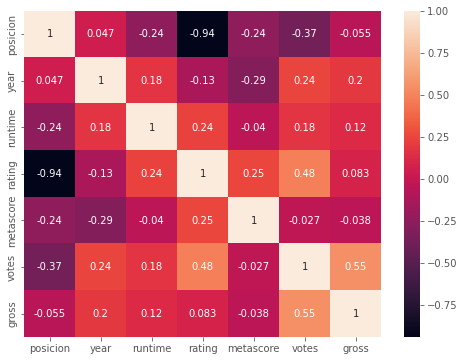

In [33]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sb.heatmap(corr_df, annot=True)
plt.show()

Podemos observar que en la matriz de correlacion las mas altas son:

* posicion con rating: -0.94, lo cual signfica que si una de las variables aumenta, la otra variable en cambio disminuye en proporción constante. Lo cual es extremandamente logico ya que el rating esta definido por la calificacion 

* votes con gross: 0.55, lo cual significa que si una de las variables aumenta, la otra variable aumenta en proporción constante. Lo cual es logico si pensamos que entre mas votos tiene una pelicula es mas popular y por lo tanto mas probable que la vieran en cine 

* votes con raitng: 0.48, lo cual significa que si una de las variables aumenta, la otra variable aumenta en proporción constante. Lo cual es interesante ya que se podria pensar que es mas facil llegar a calificaciones altas con menos votos

* metascore con year: -0.29, lo cual signfica que si una de las variables aumenta, la otra variable en cambio disminuye en proporción constante. Esto es intuitivo debido a que existe una narrativa de que el cine mas viejo es mejor, aunque note que la correlacion no es tan alta como se podria llegar a imaginar.

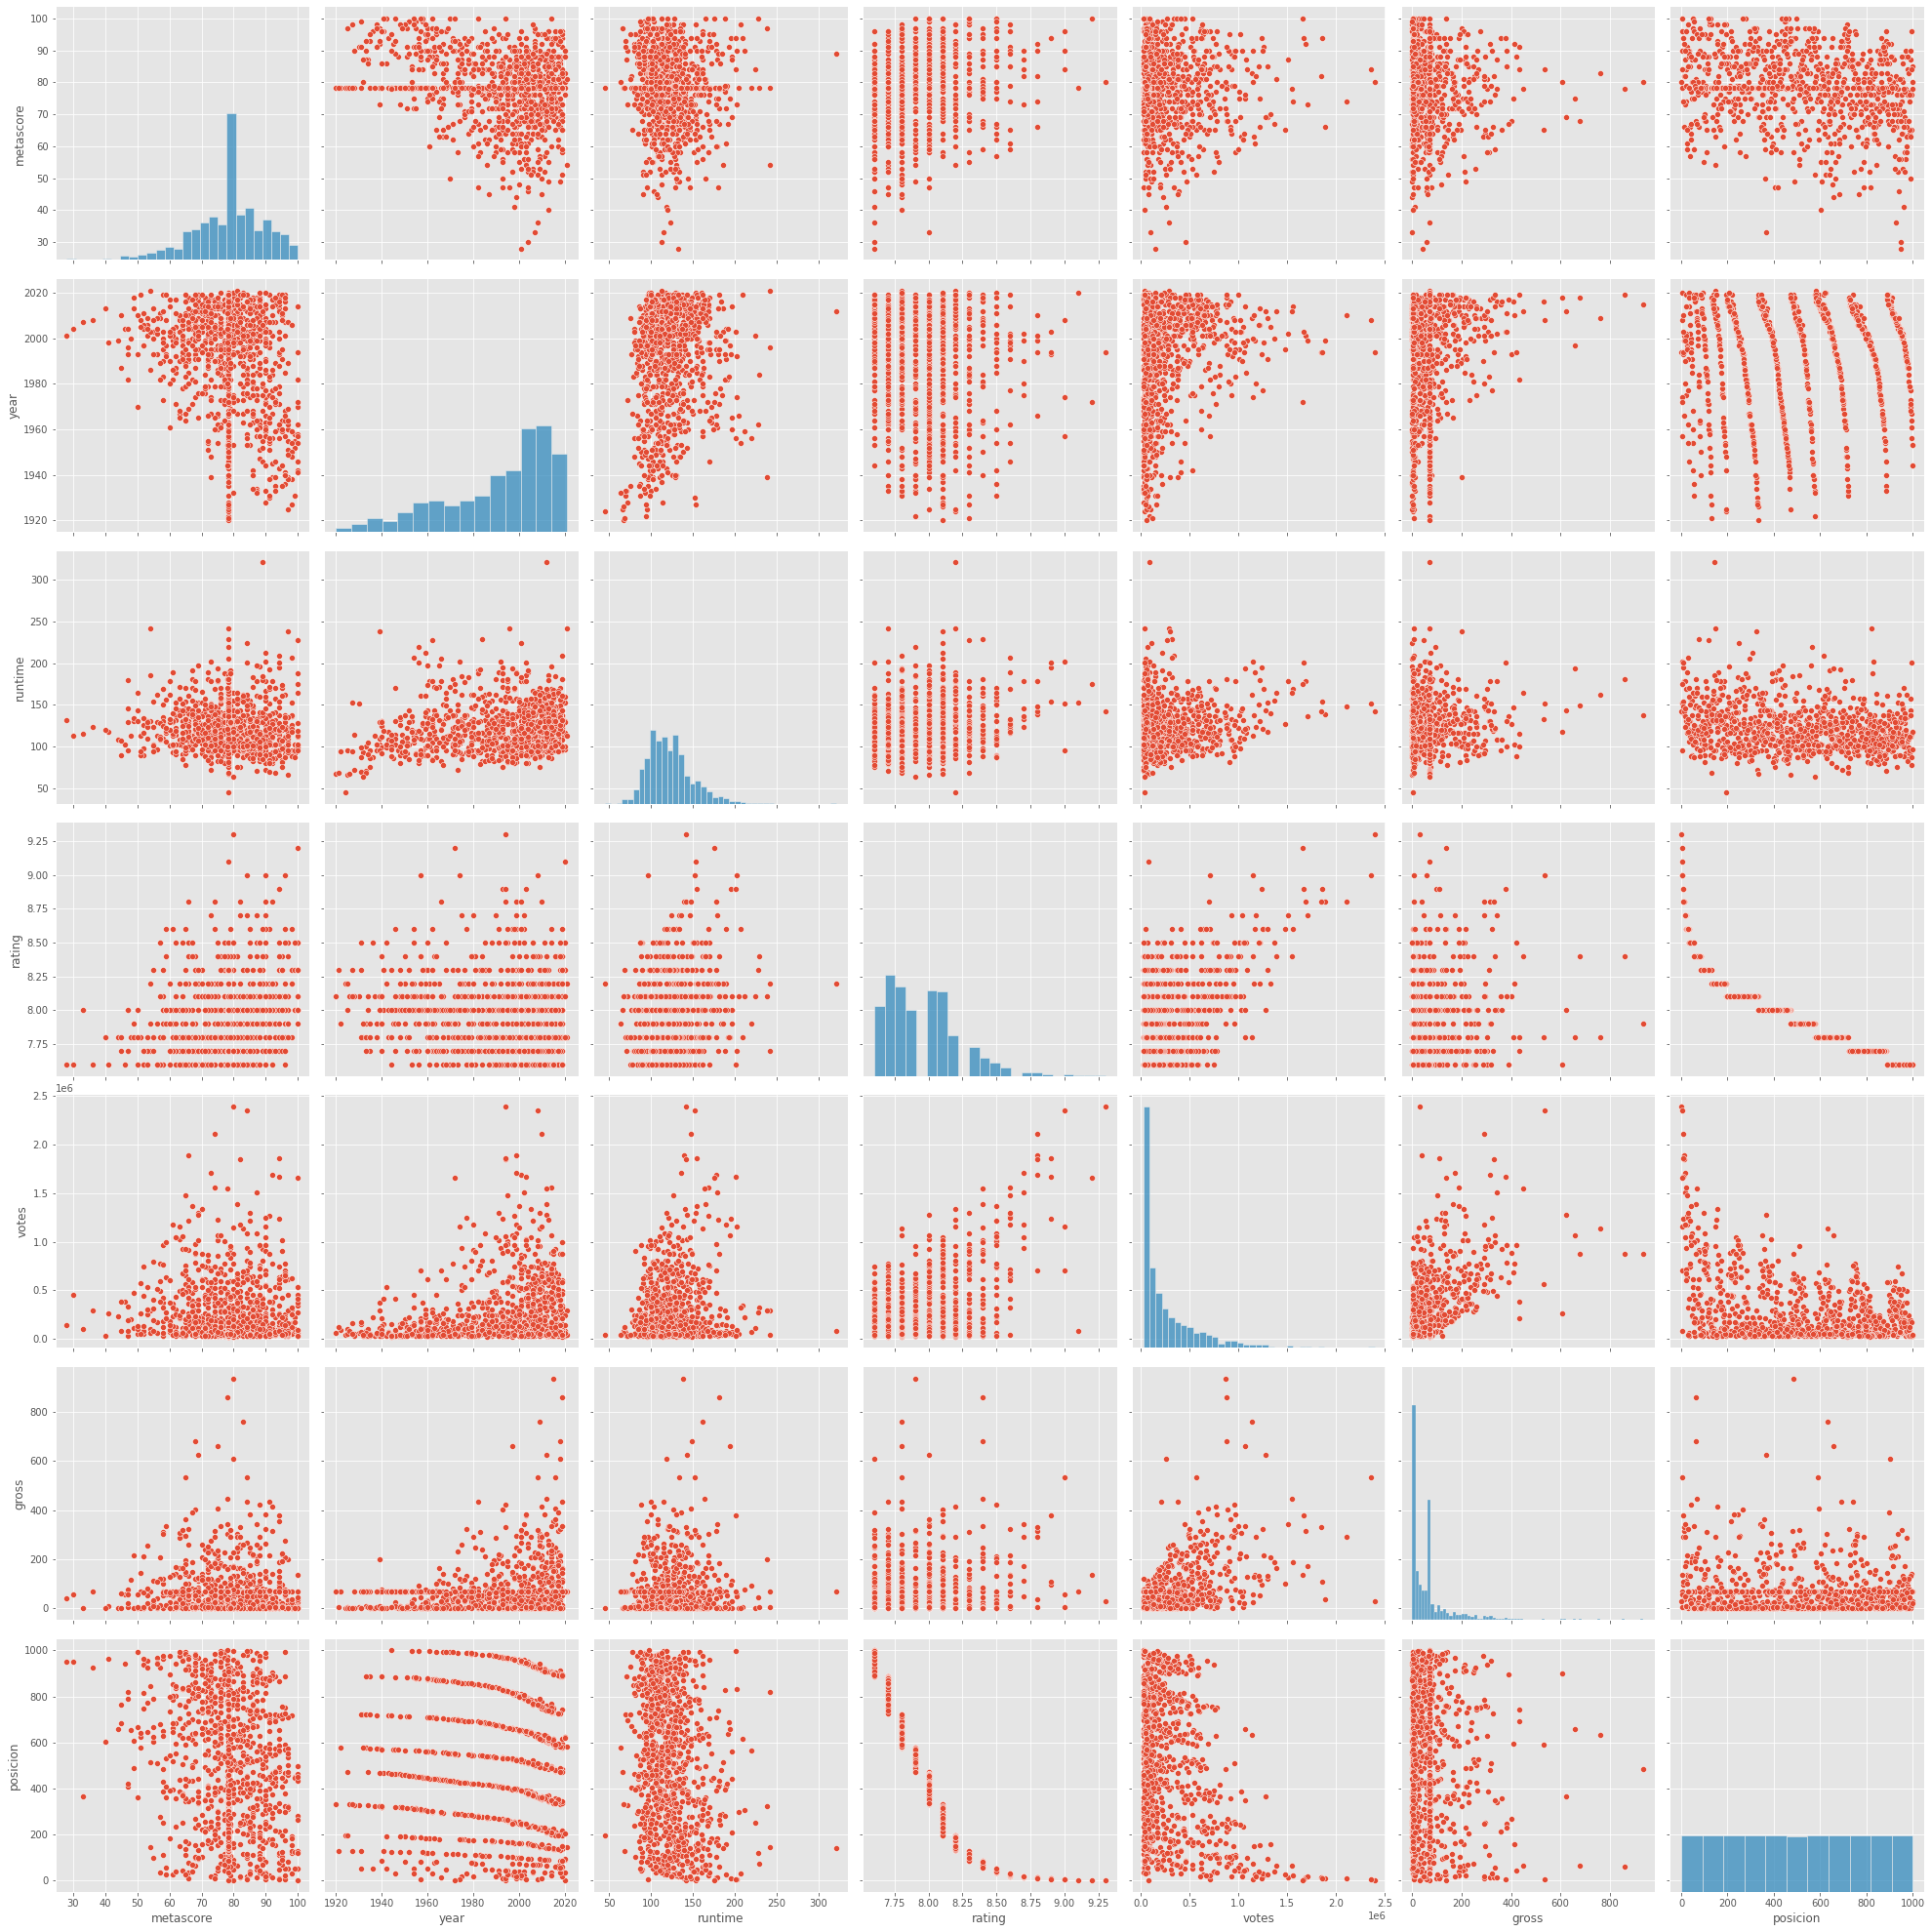

In [34]:
sb.pairplot(df,
            height=4, 
            vars=['metascore', 'year', 'runtime', 'rating','votes','gross','posicion'],
            kind='scatter')
plt.show()

En estas graficas de dispercion extremadamente densas no nos detendremos mucho en el analisis ya que nuestro modelo contemplara 3 variables y no 2 como las de estas graficas, aunque si resaltaremos las cosas mas interesantes:
* La dispersion entre metascore y posicion nos muestra como a mayor posicion tambien crece la otra, esto es intuitivo pero no era seguro ya que el ranking se organiza con las calificaciones de usuarios y no de la critica.

* La dispersion entre runtime y year es extremadante consistente, o sea, no hay casi cambios, lo que nos indica que la duracion de las peliculas no a cambiado mucho a lo largo del tiempo, exceptuando a los principios de las peliculas de la base de datos donde era un poco mas baja

###Analisis de variables a utilizar en los clusters

Dentro de las siguientes graficas observaremos el comportamiento de los datos con 3 variables distintas, para asi elegir con cual es mas claro la formacion de grupos y asi elegirlas para nuestro modelo.

* Variables 'year', ' runtime', 'rating': Podemos observar que en la primera grafica tenemos una dipsercion y un equilibrio aceptable de los datos, ademas podemos ve la formacion de algunos grupos dentro de la nube de puntos

In [35]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x="year", y="runtime", z="rating")
fig.show()

* Variables 'votes', 'year', 'gross': Podemos observar en la segunda grafica un equilibrio muy malo de las observaciones y un grupo muy consentrado de puntos contra una esquina, esto nos dificultaria el trabajo a la hora de hacer clustering

In [36]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x="votes", y="gross", z="year")
fig.show()

* Variables 'year', 'gross', 'metascore': Podemos observar en la tercera grafica un equilibrio muy malo de las observaciones y un grupo muy consentrado de puntos contra una pared, esto nos dificultaria el trabajo a la hora de hacer clustering

In [37]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x="year", y="gross", z="metascore")
fig.show()

Decidimos utilizar las variables 'year', ' runtime', 'rating' debido a que nos muestran un correcto equilibrio y dispersion de observasiones y a simple vista se pueden observar algunos grupos para el clustering

##Cloustering

###Cantidad optima de clousters

In [38]:
df_3D = np.array(df[['year', 'runtime', 'rating']])


#### Elbow Curve

`inertia_`: Suma de las distancias cuadráticas de las muestras al centro del cluster mas cercano.

Este método usa la inercia como una medida de la variación intra-cluster e intenta minimizarla. Se debe tener en cuenta que la inercia óptima (mínima) sería cero, para el caso donde cada observación es su propio cluster; pero como esto no es de mucha utilidad, el métod del codo escoge como óptimo aquel valor del número de clusters a partir del cual añadir mas clusters solo consigue una mejora mínima de la inercia.

In [39]:
def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df_3D)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

Valores:  [1342384.1709999996, 842882.8035224616, 506292.2592265225, 380695.75393976836, 313802.71182604064, 261646.60081042993, 230494.97564846496, 206978.28447616182, 184656.2815159534, 166332.0234745934]


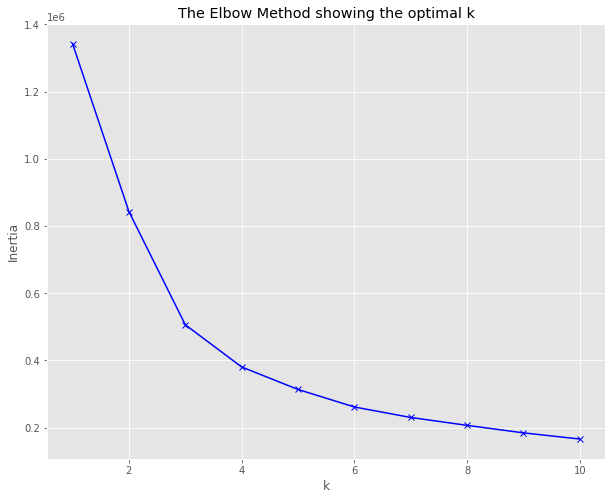

In [40]:
elbow_curve(df_3D, maxClusters = 10)

En el gráfico se puede ver claramente que a partir de k = 4 ya no hay una mejoría significativa en la reducción de la variación intra-cluster (inercia), por lo tanto, según este método, la cantidad óptima de clusters para agrupar estos datos es cuatro.

#### Estadístico de Gap

El objetivo de este método es definir un procedimiento estadístico para formalizar la heurística de la curva de codo. De forma muy simplificada, el estadístico de gap compara, para diferentes valores de k, la variación total intracluster observada frente al valor esperado acorde a una distribución uniforme de referencia (datos de referencia).

El valor a elegir será el k mas pequeño tal que en k+1 el gráfico caiga (no necesariamente es el máximo absoluto de la curva de gap).

In [41]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):
            
            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)
            
            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve 
    # su respectivo número de clusters    
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [42]:
k, gapdf = optimalK(df_3D, nrefs=5, maxClusters=10)
print('La cantidad óptima de clusters es: ', k)

La cantidad óptima de clusters es:  4


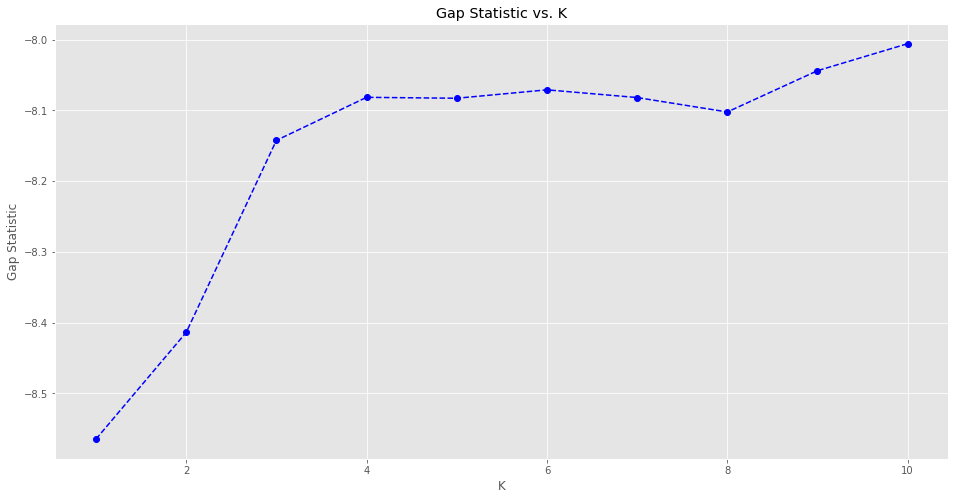

In [43]:
plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

En el grafico se puede ver como en k = 5 el valor del estadístico de gap (que hasta ahora iba creciendo de forma constante) cae sutilmente respecto a su valor en k = 4; es por esto que se selecciona cuatro como la cantidad óptima de clusters, que es igual al resultado obtenido por el metodo del codo.


#### Coeficiente de Silueta

For n_clusters = 2 The average silhouette_score is : 0.3526506798515272
For n_clusters = 3 The average silhouette_score is : 0.42747394982743414
For n_clusters = 4 The average silhouette_score is : 0.3939377644127774
For n_clusters = 5 The average silhouette_score is : 0.39267286846373706
For n_clusters = 6 The average silhouette_score is : 0.36656458765756716


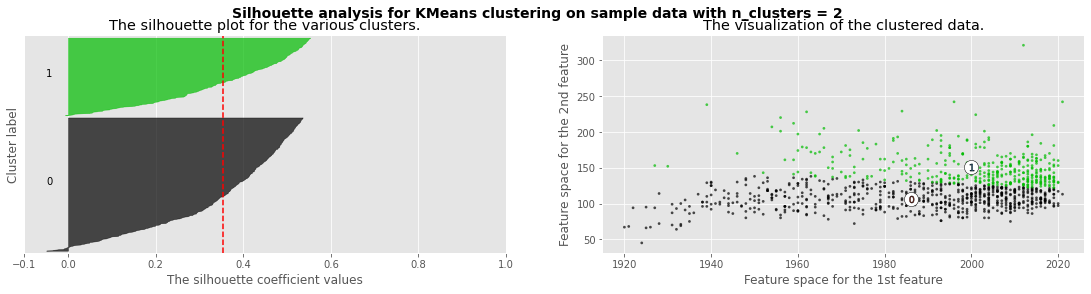

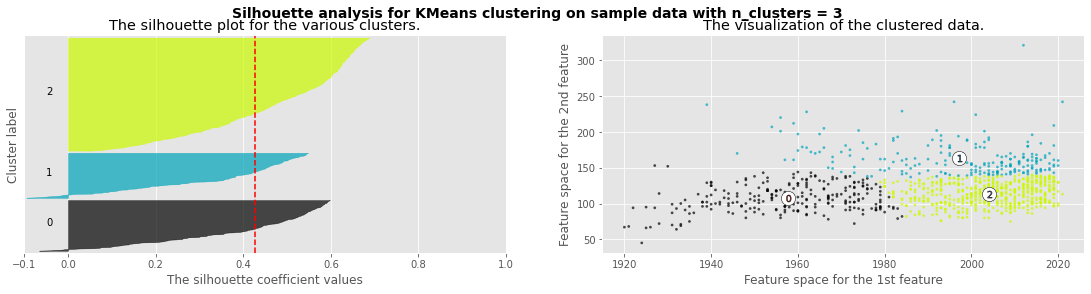

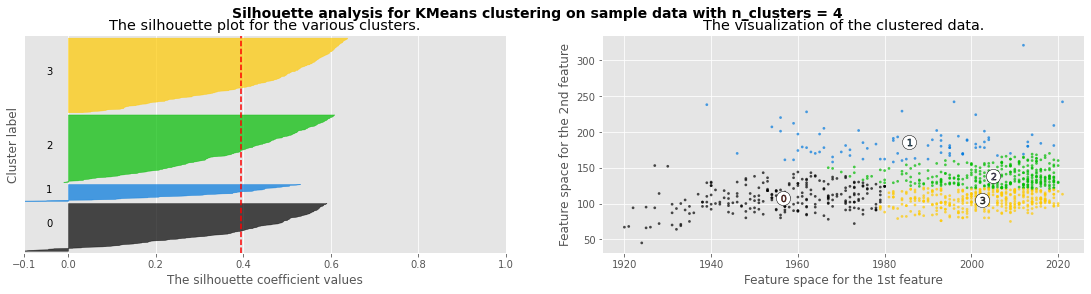

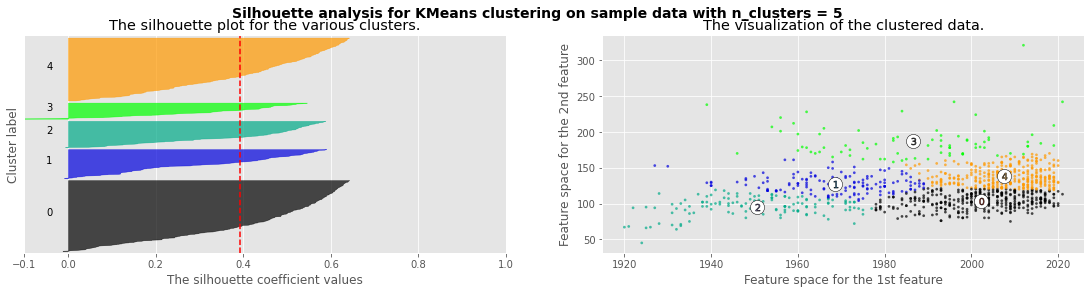

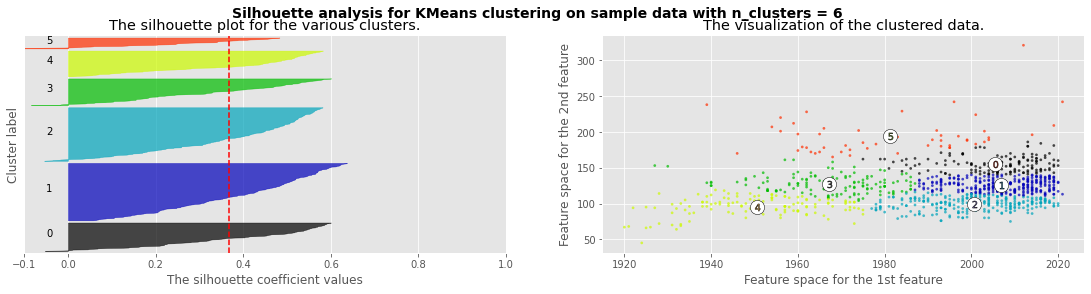

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

colors_k_means = ['cyan','purple','orange']
range_n_clusters = [2, 3, 4, 5, 6]
X = df_3D

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Podemos ver que los puntajes mas altos se obtuvieron para 3 y 4 clusters, pero se observa que los datos estan repartidos de forma mas equilibrada para k = 4, por lo tanto este sera el óptimo.

Entonces usamos k-means con k = 4.

####Analisis jerarquico mediante dendograma

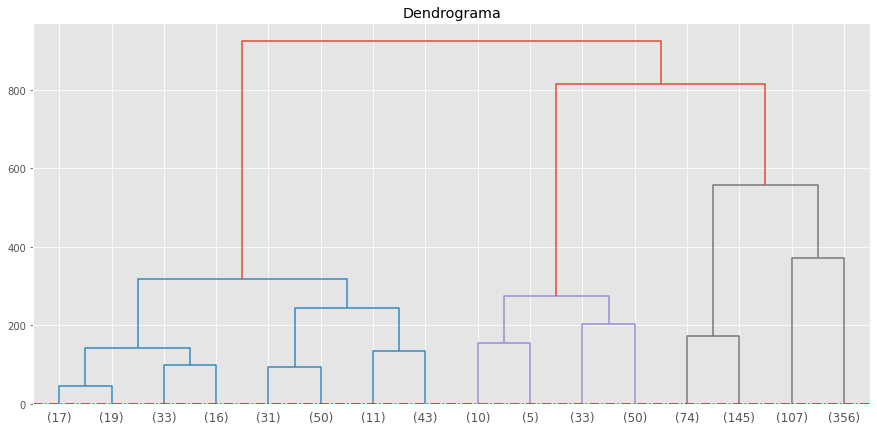

In [45]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 7))  # Se establecen las dimenciones
pyplot.title("Dendrograma") #se establece el titulo
plt.axhline(y=0.25, color='r', linestyle='-.') #Se crea la linea 
dend = shc.dendrogram(shc.linkage(df_3D, method='ward'),truncate_mode='level',p=3) #Se genera el dendograma


En el dendograma se observa que la cantidad optima de clusters es de 4, ya que, los datos estan equilibrados en una medida aceptable y no se esta teniendo una sobre especificidad de los clusters. Esto confirma lo observado en las tecnicas anteriores donde todas concuerdan que los mas optimo son 4 clusters

###Generacion y utilizacion del modelo

#### Normalizacion de los datos

In [46]:
#Normalización de los datos
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

df_3D=minmax_norm(df_3D)
df_3D

array([[9.82616470e-01, 5.58259660e-02, 4.96672296e-05],
       [9.98013311e-01, 6.42693951e-02, 2.48336148e-04],
       [9.94039932e-01, 7.66862024e-02, 9.93344591e-05],
       ...,
       [9.68212973e-01, 4.14224695e-02, 2.98003377e-04],
       [9.97516639e-01, 4.63891924e-02, 9.93344591e-05],
       [9.94039932e-01, 6.02960167e-02, 9.93344591e-05]])

#### Ajuste del modelo

In [47]:
#Ajustar modelo
kmeans_model = KMeans(n_clusters=4).fit(df_3D)

#Labels del ajuste
df_3F_labels = kmeans_model.labels_
#print(df_3F_labels)

centroides_3F = kmeans_model.cluster_centers_
#print(centroides_3F)

In [48]:
df['cluster'] = df_3F_labels #se añade las etiquetas al conjunto de datos
df.sample(10)

,posicion,name,year,runtime,genre,rating,metascore,timeline,votes,gross,cluster
100,3,Soorarai Pottru,2020,153,Drama,9.1,78.2,"Nedumaaran Rajangam ""Maara"" sets out to make t...",78266,68.20,0
402,178,Sholay,1975,162,"Action, Adventure, Comedy",8.2,78.2,After his family is murdered by a notorious an...,52184,68.20,3
64,852,Star Trek II: The Wrath of Khan,1982,113,"Action, Adventure, Sci-Fi",7.7,67.0,"With the assistance of the Enterprise crew, Ad...",114178,78.91,2
275,898,Baby Driver,2017,113,"Action, Crime, Drama",7.6,86.0,After being coerced into working for a crime b...,455013,107.83,2
801,338,La La Land,2016,128,"Comedy, Drama, Music",8.0,94.0,"While navigating their careers in Los Angeles,...",520132,151.10,0
922,877,The Magnificent Seven,1960,128,"Action, Adventure, Western",7.7,74.0,Seven gunfighters are hired by Mexican peasant...,89005,4.91,1
464,705,Bonnie and Clyde,1967,111,"Action, Biography, Crime",7.8,86.0,Bored waitress Bonnie Parker falls in love wit...,104266,68.20,1
888,715,Key Largo,1948,100,"Action, Crime, Drama",7.8,78.2,A man visits his war buddy's family hotel and ...,37565,68.20,1
897,964,Lost Highway,1997,134,"Mystery, Thriller",7.6,52.0,Anonymous videotapes presage a musician's murd...,133429,3.80,0
539,247,Amores Perros,2000,154,"Drama, Thriller",8.1,83.0,A horrific car accident connects three stories...,227009,5.38,0


Grafica de los datos separados por clouster dependiendo de su color

In [49]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x="rating", y="year", z="runtime", 
                    color="cluster")
fig.show()

Podemos observar una correcta agrupacion de las observaciones y un claro diferenciamiento de cada cluster

###Caracterizacion de cada cluster

Con las características podemos encontrar la observación mas representativa de cada cluster para así caracterizar las demás observaciones dentro del cluster.

Obtenemos la observación más cercana a cada centroide haciendo uso de pairwise_distances_argmin_min que devuelve el indice de dichas observaciones.

Ademas veremos los valores estadisticos principales de cada cluster.


In [50]:
from tabulate import tabulate 
df1=df.drop('timeline', axis=1)

closest, _ = pairwise_distances_argmin_min(centroides_3F, df_3D)
closest

array([936, 342, 797, 535])

* Cluster 0: En promedio la observaciones del cluster 0 tienen las siguientes caracteristicas:

  * year: 2002
  * runtime: 104.531856 	
  * rating: 7.868421
  * metascore: 76.211080
  * votes: 283580.3
  * gross: 64.118316

  y su observacion mas significativa es la pelicula In America y tiene las siguientes caracteristicas:

  * year: 2002
  * runtime: 105 	
  * rating: 7.7
  * metascore: 76
  * votes: 40670
  * gross: 15.54

  Con esto podemos observar que el cluster 0 en general tiene peliculas ni muy jovenes ni muy viejas en el tiempo, con una duracion por debajo de las 2 horas que es lo comun en la actualidad y con una calificacion buena tanto en rating como en metascore.




In [51]:
cluster_0 = df[df['cluster'] == 0]
cluster_0.drop('cluster', axis=1).drop('posicion',axis=1).describe()

,year,runtime,rating,metascore,votes,gross
count,332.000000,332.000000,332.000000,332.000000,3.320000e+02,332.000000
mean,2004.472892,138.186747,7.976807,75.576506,3.676910e+05,88.416142
std,11.785181,12.103334,0.301814,10.669767,4.117899e+05,121.338949
min,1967.000000,121.000000,7.600000,28.000000,2.511600e+04,0.010000
25%,1997.000000,129.000000,7.700000,69.000000,6.757900e+04,6.740000
50%,2007.000000,136.000000,7.900000,78.200000,2.246350e+05,56.810000
75%,2014.000000,146.000000,8.100000,82.000000,5.327310e+05,110.105000
max,2020.000000,170.000000,9.300000,100.000000,2.394059e+06,936.660000


In [52]:
print(tabulate(df1.iloc[[235]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   posicion | name                |   year |   runtime | genre                    |   rating |   metascore |   votes |   gross |   cluster |
|-----+------------+---------------------+--------+-----------+--------------------------+----------+-------------+---------+---------+-----------|
| 235 |        230 | Hachi: A Dog's Tale |   2009 |        93 | Biography, Drama, Family |      8.1 |        78.2 |  259769 |    68.2 |         2 |


* Cluster 1: En promedio la observaciones del cluster 1 tienen las siguientes caracteristicas:

  * year: 2004
  * runtime: 138.238671	
  * rating: 7.977341 	
  * metascore: 75.560121
  * votes: 367377
  * gross: 88.611840

  y su observacion mas significativa es la pelicula Batman Begins y tiene las siguientes caracteristicas:

  * year: 2005 
  * runtime: 140  	
  * rating:  8.2
  * metascore: 70
  * votes: 1332341 
  * gross: 206.85

  Con esto podemos observar que el cluster 1 en general tiene peliculas que avanzan mas en los adentros de los 2000, con una duracion  muy parecida a las peliculas actuales, y con una calificacion muy buena en rating y buena en metascore.

In [53]:
cluster_1 = df[df['cluster'] == 1]
cluster_1.drop('cluster', axis=1).drop('posicion',axis=1).describe()

,year,runtime,rating,metascore,votes,gross
count,221.000000,221.000000,221.000000,221.000000,2.210000e+02,221.000000
mean,1955.692308,107.683258,8.000452,84.687783,1.228132e+05,40.094299
std,14.324975,18.482895,0.235004,8.889692,1.575110e+05,43.599165
min,1920.000000,45.000000,7.600000,62.000000,2.535900e+04,0.010000
25%,1946.000000,95.000000,7.800000,78.200000,3.775300e+04,3.270000
50%,1957.000000,108.000000,8.000000,84.000000,6.757000e+04,30.500000
75%,1967.000000,121.000000,8.100000,92.000000,1.454310e+05,68.200000
max,1979.000000,153.000000,9.000000,100.000000,1.250920e+06,322.740000


In [54]:
print(tabulate(df1.iloc[[31]], headers = 'keys', tablefmt = 'orgtbl'))

|    |   posicion | name          |   year |   runtime | genre                |   rating |   metascore |   votes |   gross |   cluster |
|----+------------+---------------+--------+-----------+----------------------+----------+-------------+---------+---------+-----------|
| 31 |        824 | Fallen Angels |   1995 |        99 | Comedy, Crime, Drama |      7.7 |          71 |   28581 |    68.2 |         2 |


* Cluster 2: En promedio la observaciones del cluster 2 tienen las siguientes caracteristicas:

  * year: 1956
  * runtime: 107.438053 	
  * rating: 7.994248	
  * metascore: 84.548673 	
  * votes: 122259.3
  * gross: 40.790708

  y su observacion mas significativa es la pelicula Cat on a Hot Tin Roof y tiene las siguientes caracteristicas:

  * year: 1958 
  * runtime: 108  	
  * rating:  8.0
  * metascore: 84
  * votes: 46118 
  * gross: 17.57

  Con esto podemos observar que el cluster 2 en general tiene peliculas bastante antiguas, con una duracion  muy por debajo de los 120 minutos a los cuales estamos acostumbrados actualmente, y con una calificacion muy buena en rating y extremadamente buena en metascore.

In [55]:
cluster_2 = df[df['cluster'] == 2]
cluster_2.drop('cluster', axis=1).drop('posicion',axis=1).describe()

,year,runtime,rating,metascore,votes,gross
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000
mean,2002.002740,104.378082,7.866575,76.227945,2.805198e+05,64.331321
std,10.872765,10.802145,0.229382,11.317214,2.674943e+05,89.650867
min,1978.000000,75.000000,7.600000,30.000000,2.521300e+04,0.010000
25%,1994.000000,97.000000,7.700000,71.000000,6.815000e+04,5.020000
50%,2003.000000,105.000000,7.800000,78.000000,1.844880e+05,32.020000
75%,2010.000000,113.000000,8.000000,84.000000,4.186020e+05,68.200000
max,2021.000000,122.000000,8.600000,100.000000,1.298483e+06,608.580000


In [56]:
print(tabulate(df1.iloc[[784]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   posicion | name   |   year |   runtime | genre   |   rating |   metascore |   votes |   gross |   cluster |
|-----+------------+--------+--------+-----------+---------+----------+-------------+---------+---------+-----------|
| 784 |        442 | 8½     |   1963 |       138 | Drama   |        8 |          91 |  110795 |    0.05 |         1 |


* Cluster 3: En promedio la observaciones del cluster 3 tienen las siguientes caracteristicas:

  * year: 1985
  * runtime: 185.890244	
  * rating: 8.125610 	
  * metascore: 79.685366	
  * votes: 335163.2
  * gross: 78.923902

  y su observacion mas significativa es la pelicula  Fanny and Alexander y tiene las siguientes caracteristicas:

  * year: 1982 
  * runtime: 188  	
  * rating:  8.1
  * metascore: 100
  * votes: 58600 
  * gross: 4.97

  Con esto podemos observar que el cluster 3 en general tiene peliculas antiguas pero que se adentran un poco mas en la epoca de los 90, con una duracion mucho mas larga a la que estamos acostumbrados actualmente, y con una calificacion extremadamente buena en rating y muy buena en metascore.

In [57]:
cluster_3 = df[df['cluster'] == 3]
#cluster_3
cluster_3.drop('cluster', axis=1).drop('posicion',axis=1).describe()

,year,runtime,rating,metascore,votes,gross
count,82.000000,82.000000,82.000000,82.000000,8.200000e+01,82.000000
mean,1985.536585,185.890244,8.125610,79.685366,3.351632e+05,78.923902
std,19.454407,24.775539,0.329538,12.164877,4.411421e+05,134.558531
min,1939.000000,158.000000,7.600000,47.000000,2.570900e+04,0.070000
25%,1968.500000,170.000000,7.925000,73.500000,6.026850e+04,5.245000
50%,1988.500000,180.000000,8.100000,78.200000,1.231535e+05,46.885000
75%,2000.500000,193.750000,8.200000,89.750000,3.340355e+05,69.857500
max,2021.000000,321.000000,9.200000,100.000000,1.693187e+06,858.370000


In [58]:
print(tabulate(df1.iloc[[498]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   posicion | name                |   year |   runtime | genre                    |   rating |   metascore |   votes |   gross |   cluster |
|-----+------------+---------------------+--------+-----------+--------------------------+----------+-------------+---------+---------+-----------|
| 498 |        123 | Singin' in the Rain |   1952 |       103 | Comedy, Musical, Romance |      8.3 |          99 |  222996 |    8.82 |         1 |


##Conclusiones

###Tendencias de los datos



1.   En promedio, las calificaciones mas altas estaban en años mas bajos, esto se puede evidenciar en el cluster 2 y 3 en los cuales el rating y el metascore eran en promedio mas altos que en los clusters 0 y 1 donde los años eran en promedio mas altos 


2.   En promedio, el cluster 3 tiene tiempos de duracion mucho mayores, esto lo podemos ver con su promedio de 185 minutos y con su minimo de 158 minutos, esto relacionado a que en promedio al ser mas larga la pelicula obtiene una mayor calificacion por el publico, esto lo podemos observar ya que su promedio en rating es el mas alto de los cluster 8.1.


3. En promedio, entre mas alto es el año mas votos por la audiencia tiene, esto lo podemos evidenciar con los clusters 2 y 1, los cuales son los que tienen las peliculas mas viejas en promedio  y nuevas en promedio respectivamente. 


4. Todos los clusters tienen como maxima calificacion de metascore un 100, lo cual nos indica que sin importar las caracteristicas es posible que una  pelicula sea valorada como obra maestra por la critica, esto probablemente a que son personas que tratan de evitar un sesgo en la mayor medida posible


5. En promedio, el dinero recogido por las peliculas no depende de su año de publicacion, esto lo podemos ver en los cluster 3 y 0 los cuales tienen en promedio recogido 78 millones en promedio y 64 millones en promedio  respectivamente, esto tiene sentido debido a que el dinero recogido depende de muchos factores dentro del estreno de la pelicula.


